In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Stocks = pd.read_excel('/content/CAPSTOCKS.xlsx')
Stocks


,Date,Close
0,2014-01-02 16:59:59.712,20950.0
1,2014-01-03 16:59:59.712,20704.0
2,2014-01-06 16:59:59.712,20340.0
3,2014-01-07 16:59:59.712,20900.0
4,2014-01-08 16:59:59.712,20700.0
...,...,...
2492,2023-12-21 16:59:59.712,192544.0
2493,2023-12-22 12:02:00.096,198500.0
2494,2023-12-27 16:59:59.712,199796.0
2495,2023-12-28 16:59:59.712,200505.0


In [2]:
# Calculate the 20-period Simple Moving Average (SMA)
Stocks['SMA'] = Stocks['Close'].rolling(window=10).mean()

# Calculate the 20-period Standard Deviation (SD)
Stocks['SD'] = Stocks['Close'].rolling(window=10).std()

# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
Stocks['UB'] = Stocks['SMA'] + 2 * Stocks['SD']
Stocks['LB'] = Stocks['SMA'] - 2 * Stocks['SD']

Stocks.tail(11)

,Date,Close,SMA,SD,UB,LB
2486,2023-12-12 16:59:59.712,190049.0,194127.3,1914.315140,197955.930280,190298.669720
2487,2023-12-13 16:59:59.712,189992.0,193522.8,2180.238815,197883.277629,189162.322371
2488,2023-12-14 16:59:59.712,195878.0,193503.5,2155.893486,197815.286972,189191.713028
2489,2023-12-18 16:59:59.712,188886.0,192847.8,2474.112896,197796.025792,187899.574208
2490,2023-12-19 16:59:59.712,189734.0,192389.6,2593.405706,197576.411412,187202.788588
2491,2023-12-20 16:59:59.712,191588.0,192351.2,2603.100835,197557.401669,187144.998331
2492,2023-12-21 16:59:59.712,192544.0,192078.9,2398.587892,196876.075785,187281.724215
2493,2023-12-22 12:02:00.096,198500.0,192446.6,3057.366739,198561.333478,186331.866522
2494,2023-12-27 16:59:59.712,199796.0,193098.1,3847.081966,200792.263933,185403.936067
2495,2023-12-28 16:59:59.712,200505.0,193747.2,4509.377188,202765.954376,184728.445624


In [6]:
Stocks['Signal'] = 0
#Buy signal when the closing price is  above the upper band
Stocks.loc[(Stocks['Close'] > Stocks['UB']) & (Stocks['Close'].shift(1) <= Stocks['UB'].shift(1)), 'Signal'] = 1

#Sell signal when the closing price is below the lower band
Stocks.loc[(Stocks['Close'] < Stocks['LB']) & (Stocks['Close'].shift(1) >= Stocks['LB'].shift(1)), 'Signal'] = -1

Stocks.tail(11)

,Date,Close,SMA,SD,UB,LB,Signal
2486,2023-12-12 16:59:59.712,190049.0,194127.3,1914.315140,197955.930280,190298.669720,-1
2487,2023-12-13 16:59:59.712,189992.0,193522.8,2180.238815,197883.277629,189162.322371,0
2488,2023-12-14 16:59:59.712,195878.0,193503.5,2155.893486,197815.286972,189191.713028,0
2489,2023-12-18 16:59:59.712,188886.0,192847.8,2474.112896,197796.025792,187899.574208,0
2490,2023-12-19 16:59:59.712,189734.0,192389.6,2593.405706,197576.411412,187202.788588,0
2491,2023-12-20 16:59:59.712,191588.0,192351.2,2603.100835,197557.401669,187144.998331,0
2492,2023-12-21 16:59:59.712,192544.0,192078.9,2398.587892,196876.075785,187281.724215,0
2493,2023-12-22 12:02:00.096,198500.0,192446.6,3057.366739,198561.333478,186331.866522,0
2494,2023-12-27 16:59:59.712,199796.0,193098.1,3847.081966,200792.263933,185403.936067,0
2495,2023-12-28 16:59:59.712,200505.0,193747.2,4509.377188,202765.954376,184728.445624,0


In [7]:
for i in range(len(Stocks)-2,28,-1):
    if Stocks.loc[i+1, 'Signal'] == Stocks.loc[i, 'Signal']:
        Stocks.loc[i+1, 'Signal'] = 0

Stocks.loc[29,'Signal']=0
Stocks.head(350)

,Date,Close,SMA,SD,UB,LB,Signal
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN,NaN,NaN,0
1,2014-01-03 16:59:59.712,20704.0,NaN,NaN,NaN,NaN,0
2,2014-01-06 16:59:59.712,20340.0,NaN,NaN,NaN,NaN,0
3,2014-01-07 16:59:59.712,20900.0,NaN,NaN,NaN,NaN,0
4,2014-01-08 16:59:59.712,20700.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
345,2015-05-22 16:59:59.712,53499.0,53029.6,1003.876177,55037.352353,51021.847647,0
346,2015-05-25 16:59:59.712,53681.0,52997.7,974.244784,54946.189569,51049.210431,0
347,2015-05-26 16:59:59.712,53280.0,52925.7,916.855987,54759.411973,51091.988027,0
348,2015-05-27 16:59:59.712,51800.0,52908.0,938.655066,54785.310132,51030.689868,0


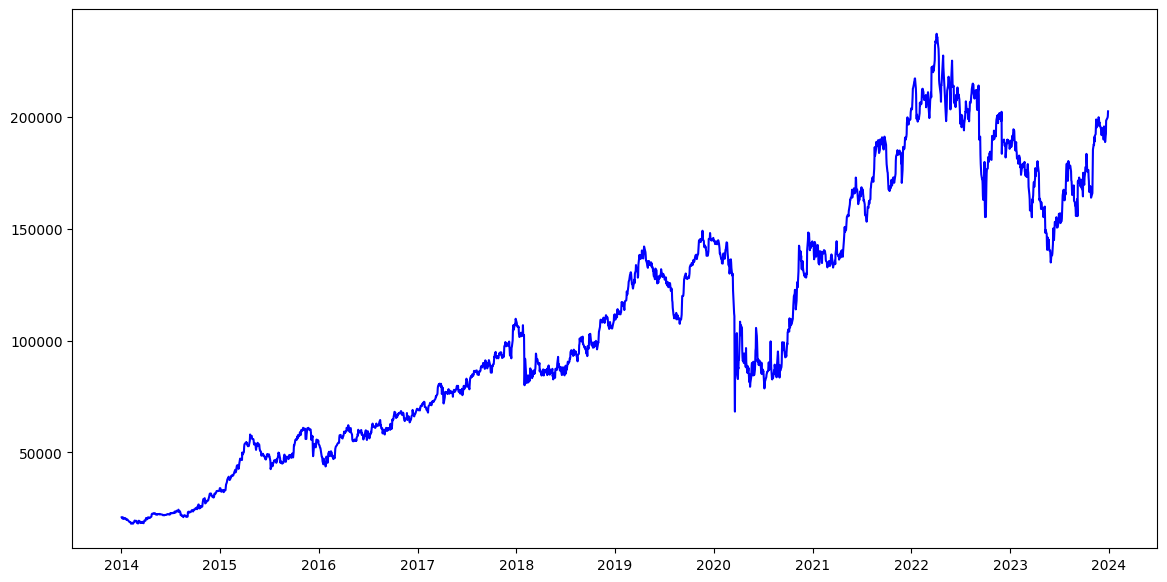

In [8]:
plt.figure(figsize =(14,7))
plt.plot(Stocks['Date'],Stocks['Close'],label ='Close', color= 'blue')


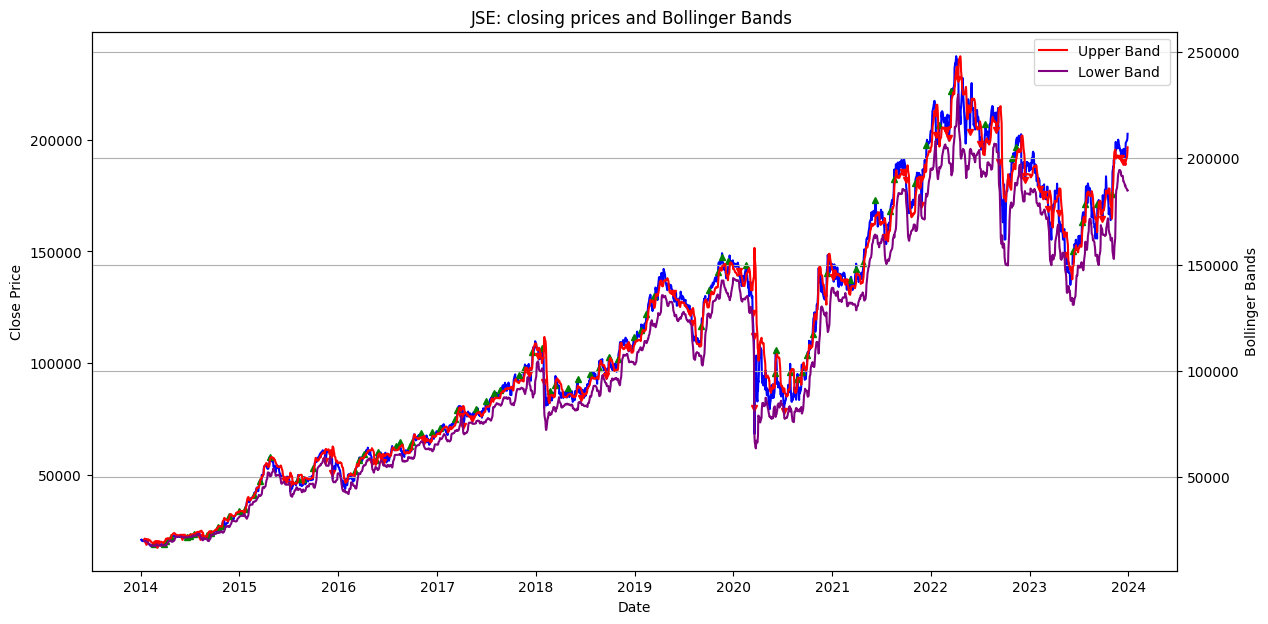

In [17]:
plt.figure(figsize =(14,7))

#Plotting the Close prices
plt.plot (Stocks['Date'],Stocks['Close'],label ='Close', color= 'blue')

#Plotting the buy Signals
plt.plot(Stocks[Stocks['Signal'] == 1]['Date'],
         Stocks[Stocks['Signal']== 1]['Close'],
         '^',markersize=5, color='green',label ='Sell signal')

#Plotting the sell signals
plt.plot(Stocks[Stocks['Signal'] == -1]['Date'],
         Stocks[Stocks['Signal'] == -1]['Close'],
         'v',markersize= 5, color='red', label ='Sell signal')

#Adding a secondary y-axis for the Bollinger bands
ax1 = plt.gca()
ax2 = ax1.twinx()

#Plotting the Bollinger bands

# ax2.plot(Stocks['Date'],Stocks['Signal'],label ='Close', color= 'blue')
plt.plot (Stocks['Date'],Stocks['UB'],label ='Upper Band', color= 'red')
plt.plot (Stocks['Date'],Stocks['LB'],label ='Lower Band ', color= 'purple')




#Setting the labels and titles
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('Bollinger Bands')
plt.title('Close Price and Bollinger Bands')

plt .title('JSE: closing prices and Bollinger Bands ')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
def backtest_strategy(Stocks, signal_column):
    total_returns = 0
    total_trades = 0
    holding_position = False

    for i in range(len(Stocks)):
        signal = Stocks[signal_column].iloc[i]
        close_price = Stocks['Close'].iloc[i]

        if signal == 1 and not holding_position:  # Buy signal
            buy_price = close_price
            holding_position = True

        elif signal == 0 and holding_position:  # Sell signal
            sell_price = close_price
            # Calculate percentage return from the trade
            trade_return = (sell_price - buy_price) / buy_price
            total_returns += trade_return
            total_trades += 1
            holding_position = False  # Reset position

    # This line was incorrectly indented
    total_returns_percentage = total_returns * 100
    return total_returns_percentage, total_trades

backtest_strategy(Stocks, 'Signal')



(38.077744688261, 86)

KeyError: "['Signal'] not found in axis"

NameError: name 'confusion_matrix' is not defined